## **OOP: EXAMPLE 2**

Build a simple linear regression (single or multivariate) estimator class following the OOP paradigm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**1. Define the class**

In [2]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        '''
        Initialize the class
        fit_intercept: Boolean switch to indicate whether to include
        an intercept in the model
        '''
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

**2. Create an instance and check atributes**

In [3]:
mlr = MyLinearRegression()
mlr._fit_intercept

True

In [4]:
mlr.coef_==None

True

In [5]:
mlr.intercept_ == None

True

**3.Build-in description method**

In [6]:
import numpy as np
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        '''
        Initialize the class
        fit_intercept: Boolean switch to indicate whether to include
        an intercept in the model
        '''
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"

In [7]:
mlr = MyLinearRegression()
print(mlr)

I am a Linear Regression model!


**4.Adding the fit method**

In [8]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

In [9]:
mlr = MyLinearRegression()
print("We have not fitted the data yet. There is no regression coefficients")
print("Regression coefficients:", mlr.coef_)

We have not fitted the data yet. There is no regression coefficients
Regression coefficients: None


**5. To check the values, generate data**

In [10]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [11]:
mlr.fit(X,y)

In [12]:
print("We have fitted the data. We can print the regression coefficients now")
print("Regression coefficients:", mlr.coef_)
print("The intercept term is given by: ", mlr.intercept_)

We have fitted the data. We can print the regression coefficients now
Regression coefficients: [ 3.56197982 -1.3374653 ]
The intercept term is given by:  0.5875327445390255


**6.Include a method to graph**

In [13]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()

**7.Check the method to graph**

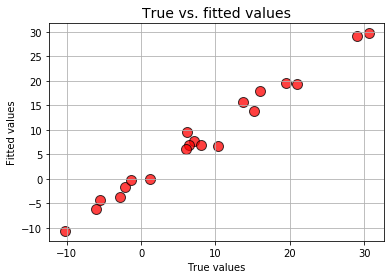

In [14]:
# A fresh instance
mlr = MyLinearRegression()
# Fitting with the data
mlr.fit(X,y)

# Call the 'plot_fitted' method
mlr.plot_fitted()

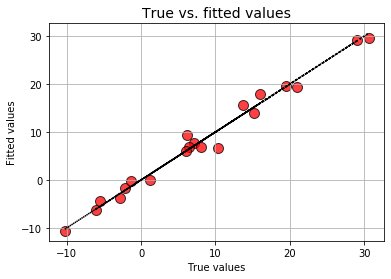

In [15]:
# We can pass on a switch 'reference_line' to draw a 45-degree reference line on the plot
mlr.plot_fitted(reference_line=True)

**8.Adding a predict method**

In [16]:
class MyLinearRegression:
    
    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept
    
    def __repr__(self):
        return "I am a Linear Regression model!"
    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """
        
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
            
        # add bias if fit_intercept is True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X
        
        # closed form solution
        xTx = np.dot(X_biased.T, X_biased)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_xTx, xTy)
        
        # set attributes
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef
            
        # Predicted/fitted y
        self.fitted_ = np.dot(X,mlr.coef_) + mlr.intercept_
    
    def plot_fitted(self,reference_line=False):
        """
        Plots fitted values against the true output values from the data
        
        Arguments:
        reference_line: A Boolean switch to draw a 45-degree reference line on the plot
        """
        plt.title("True vs. fitted values",fontsize=14)
        plt.scatter(y,self.fitted_,s=100,alpha=0.75,color='red',edgecolor='k')
        if reference_line:
            plt.plot(y,y,c='k',linestyle='dotted')
        plt.xlabel("True values")
        plt.ylabel("Fitted values")
        plt.grid(True)
        plt.show()
    
    def predict(self, X):
        """Output model prediction.

        Arguments:
        X: 1D or 2D numpy array
        """
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        self.predicted_ = self.intercept_ + np.dot(X, self.coef_)
        return self.predicted_

**9.Check the predict method**

In [19]:
num_new_samples = 10
X_new = 10*np.random.random(size=(num_new_samples,2))
y_new = 3.5*X_new.T[0]-1.2*X_new.T[1]+2*np.random.randn(num_new_samples)
mlr = MyLinearRegression()
mlr.fit(X,y)
y_pred=mlr.predict(X_new)
y_pred

array([16.75509652,  6.80351727,  3.80855446, 29.079156  ,  4.83860375,
       17.59440736, 10.34025641, 30.27983101, 13.14194737,  3.41943947])

**10.Class with inheritage**

Now we inherit the Metrics class in the MyLinearRegression class by passing on Metrics in the very defination of the MyLinearRegression class.

We also need to add a new attribute - resid_. These are the residuals (the difference between the fitted values and true target_/output values), which are used by the methods in the Metrics perform the necessary computations.

In [20]:
class Metrics:
    '''
    Measure the quality of the predictions
    '''
              
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.resid_) ** 2
        self.sq_error_ = np.sum(squared_errors)
        return self.sq_error_
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target_)
        squared_errors = (self.target_ - avg_y) ** 2
        self.sst_ = np.sum(squared_errors)
        return self.sst_
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        self.r_sq_ = 1 - self.sse()/self.sst()
        return self.r_sq_
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        self.adj_r_sq_ = 1 - (self.sse()/self.dfe_) / (self.sst()/self.dft_)
        return self.adj_r_sq_
    
    def mse(self):
        '''returns calculated value of mse'''
        self.mse_ = np.mean( (self.predict(self.features_) - self.target_) ** 2 )
        return self.mse_
    
    def pretty_print_stats(self):
        '''returns report of statistics for a given model object'''
        items = ( ('sse:', self.sse()), ('sst:', self.sst()), 
                 ('mse:', self.mse()), ('r^2:', self.r_squared()), 
                  ('adj_r^2:', self.adj_r_squared()))
        for item in items:
            print('{0:8} {1:.4f}'.format(item[0], item[1]))

**11.Check inheritage**

In [26]:
mlr = MyLinearRegression()
fit=mlr.fit(X,y)
print('SSE:', mlr.sse())
print('SST:', mlr.sst())
print('r_squared', mlr.r_squared())
print('All metrics:')
mlr.pretty_print_stats()

SSE: 44.438499738415636
SST: 2490.1794981592225
r_squared 0.9821544993960214
All metrics:
sse:     44.4385
sst:     2490.1795
mse:     2.2219
r^2:     0.9822
adj_r^2: 0.9801


## **REFERENCES**
* ["Understanding Object-Oriented Programming Through Machine Learning"](https://dziganto.github.io/classes/data%20science/linear%20regression/machine%20learning/object-oriented%20programming/python/Understanding-Object-Oriented-Programming-Through-Machine-Learning/)
* ["Repo: Understanding Object-Oriented Programming Through Machine Learning"](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/OOP_in_ML/Class_MyLinearRegression.ipynb)